In [1]:
from torch_pgd import pgd_attack
from utils import get_pretrained_model

import torch as ch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

import os, random

In [2]:
def tensor2pic(ImA, pop_img=False, save=False, name="pil_image.png", verbose=False):
    ImA = ImA[0].numpy()
    ImA = ImA.transpose(1, 2, 0)
    img = Image.fromarray(np.uint8(ImA * 255), 'RGB')
    if save:
        if verbose:
            print("Storing image:", name)
        img.save(name)
    if pop_img:
        img.show()
    else:
        return img

In [3]:
# Storage details
save_images = True
title = "rep_"
save_path = 'Results/img2img/'
images = []

In [4]:
# Parameters
eps = 60
steps = 80
step_size = 0.5
targeted_attack = True
norm = 'l2'
verbose = False

In [5]:
# Models and datasets
dataset_path = 'datasets/'
model_names = ['s2w', 'h2z', 'a2o']
model_paths = ['summer2winter/', 'horse2zebra/', 'apple2orange/']

In [6]:
# Maximizes both respective classes for an image
def generate_im2im(image_tensor, title, model_name, orig, save=False, verbose=False):
    
    _, model = get_pretrained_model(model_name)
    model.eval()
    
    out_img_0 = pgd_attack(image_tensor, eps=eps, model=model, steps=steps, step_size=step_size, 
                           targeted_attack=targeted_attack, target_class=0, 
                           norm=norm, verbose=verbose)
    
    out_img_1 = pgd_attack(image_tensor, eps=eps, model=model, steps=steps, step_size=step_size, 
                           targeted_attack=targeted_attack, target_class=1, 
                           norm=norm, verbose=verbose)
    
    # Storing them
    if save:
        tensor2pic(image_tensor.detach(), save=True, name=save_path+title+model_name+orig+"_orig.png", verbose=verbose)
        tensor2pic(out_img_0, save=True, name=save_path+title+model_name+orig+"_toA.png", verbose=verbose)
        tensor2pic(out_img_1, save=True, name=save_path+title+model_name+orig+"_toB.png", verbose=verbose)
    
    return out_img_0, out_img_1

In [7]:
# Picks a random image from each class for all three examples
for model_path, model_name in zip(model_paths, model_names):
    # Class A
    pathA = dataset_path+model_path+'testA/'
    fileA = random.choice(os.listdir(pathA))
    
    imA = Image.open(pathA + fileA)
    img_tA = transforms.ToTensor()(imA).view(1, 3, 256, 256)
    
    imga2a, ima2b = generate_im2im(img_tA, title, model_name, "_A", save=save_images)
    
    images += [img_tA.detach(), imga2a, ima2b]
    
    # Class B
    pathB = dataset_path+model_path+'testB/'
    fileB = random.choice(os.listdir(pathB))
    
    imB = Image.open(pathB + fileB)
    img_tB = transforms.ToTensor()(imB).view(1, 3, 256, 256)
    
    imgb2a, imb2b = generate_im2im(img_tB, title, model_name, "_B", save=save_images)
    
    images += [img_tB.detach(), imgb2a, imb2b]

### The actual images

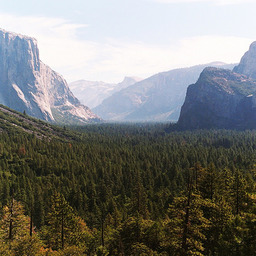

In [8]:
tensor2pic(images[0])

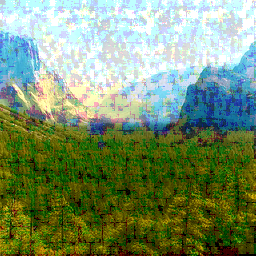

In [9]:
tensor2pic(images[1])

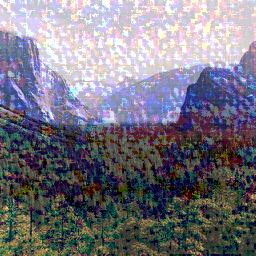

In [10]:
tensor2pic(images[2])

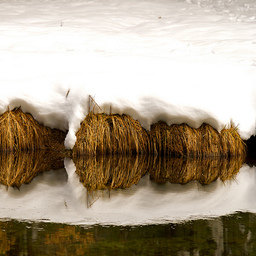

In [11]:
tensor2pic(images[3])

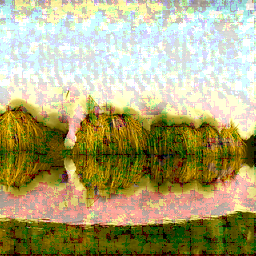

In [12]:
tensor2pic(images[4])

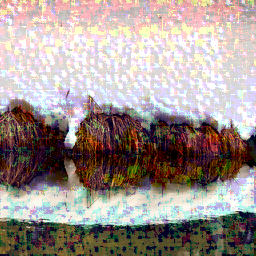

In [13]:
tensor2pic(images[5])

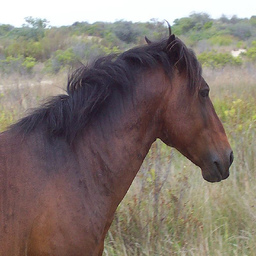

In [14]:
tensor2pic(images[6])

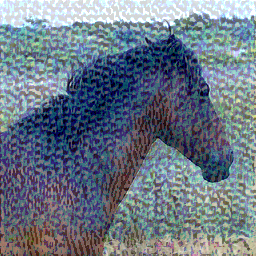

In [15]:
tensor2pic(images[7])

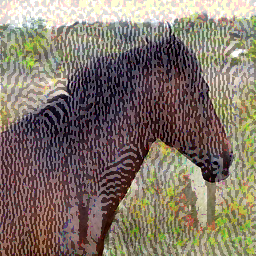

In [16]:
tensor2pic(images[8])

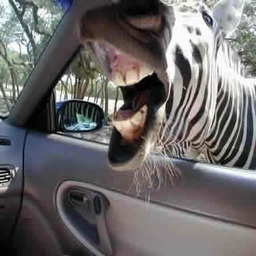

In [17]:
tensor2pic(images[9])

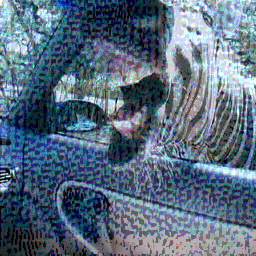

In [18]:
tensor2pic(images[10])

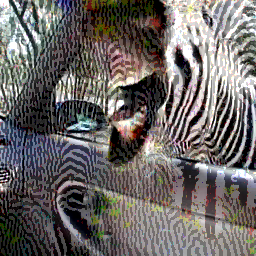

In [19]:
tensor2pic(images[11])

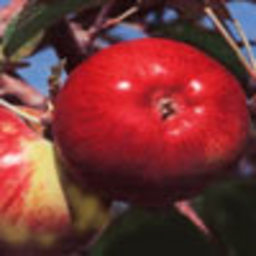

In [20]:
tensor2pic(images[12])

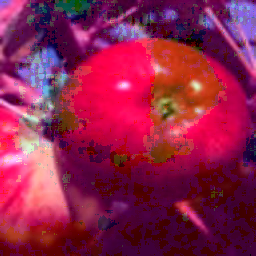

In [21]:
tensor2pic(images[13])

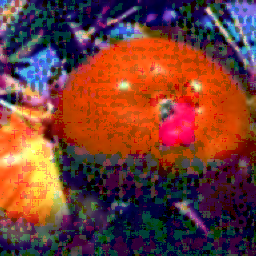

In [22]:
tensor2pic(images[14])

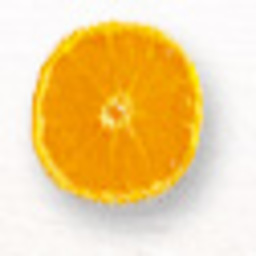

In [23]:
tensor2pic(images[15])

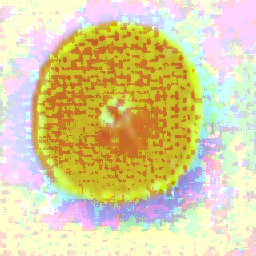

In [24]:
tensor2pic(images[16])

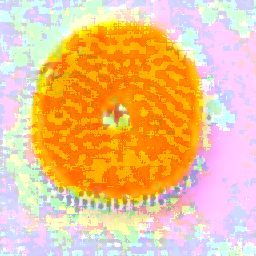

In [25]:
tensor2pic(images[17])